# UCB (Upper Confidence Bound)
## ----------------------------------------------------

Step 1: At each round $n_{i}$ we consider two numbers for each id $i$:

- $N_{i}(n)$ - the number of times the ad $i$ was selected up to round $n$
- $R_{i}(n)$ - the sum of rewards of the ad $i$ up to round $n$

Step 2: From these two numbers we compute:
- the average reward of ad $i$ up to round $n$
\begin{equation}
\overline{r_{i}}(n) = \frac{R_{i}(n)}{N_{i}(n)}
\end{equation}

- the confidence interval $[\overline{r_{i}} - \Delta_{i}(n), \overline{r_{i}} + \Delta_{i}(n)]$ at round $n$ with
\begin{equation}
\Delta_{i}(n) = \sqrt{\frac{3log(n)}{2 N_{i}(n)}}
\end{equation}

Step 3: We select the ad $i$ that has the maximum UCB $\overline{r_{i}}(n) + \Delta_{i}(n)$

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import math
style.use('ggplot')

df = pd.read_csv('../datasets/Ads_CTR_Optimisation.csv')
df.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [27]:
# implementing UCB (Upper Confidence Bound)

n_ads = 10
n_rounds = len(df)

ads_selected = []
number_of_selections = [0] * n_ads
sums_of_rewards = [0] * n_ads
total_reward = 0

for i in range(n_rounds):
    max_upper_bound = 0
    selected_ad = 0
    
    for j in range(n_ads):
        # for the first ten rounds, just select each ad once 
        # round 1 - first ad, round 2 - second ad ...
        # that is why we have the else clause there
        if number_of_selections[j] > 0:        
            avg_reward = sums_of_rewards[j] / number_of_selections[j]
            delta_i = math.sqrt(3/2 * math.log(i+1) / number_of_selections[j])
            upper_bound = avg_reward + delta_i
        else:
            upper_bound = 1e400

        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            selected_ad = j
    
    ads_selected.append(selected_ad)
    number_of_selections[selected_ad] += 1
    reward = df.values[i, selected_ad]
    sums_of_rewards[selected_ad] += reward
    total_reward += reward

In [28]:
total_reward

2178

In [30]:
ads_dict = {}
for ad in ads_selected:
    if ad in ads_dict:
        ads_dict[ad] += 1
    else:
        ads_dict[ad] = 1

ads_dict

{0: 705,
 1: 387,
 2: 186,
 3: 345,
 4: 6323,
 5: 150,
 6: 292,
 7: 1170,
 8: 256,
 9: 186}

Text(0, 0.5, '# selected')

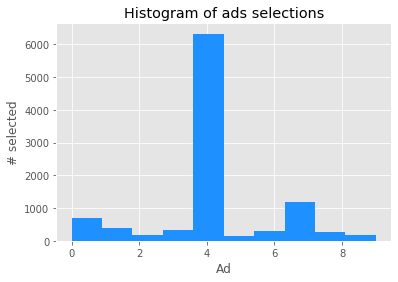

In [40]:
plt.hist(ads_selected, color='dodgerblue')
plt.title('Histogram of ads selections')
plt.xlabel('Ad')
plt.ylabel('# selected')